In [21]:
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
import seaborn as sb

%matplotlib inline

In [2]:
iris_dataset = load_iris()
iris_dataset = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])

In [3]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
sep_length = iris_dataset['sepal length (cm)']
sep_width = iris_dataset['sepal width (cm)']
pet_length = iris_dataset['petal length (cm)']
pet_width = iris_dataset['petal width (cm)']

In [ ]:
sb.set()
sb.pairplot(iris_dataset[['sepal length (cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)', 'target']], hue="target", diag_kind="kde")

In [ ]:
# plt.scatter(x=pet_length, y=pet_width, color=['r','g','b'], label=['setosa','versicolor','verginica'])
# def plot_scatter(x_val,y_val,target,col,axes=None): 
#     ax = target.plot.scatter(x=x_val, y=y_val, color=col, ax)
axes = iris_dataset[iris_dataset.target == 0.0].plot.scatter(x='petal length (cm)', y='petal width (cm)', color='red', label='Setosa')
iris_dataset[iris_dataset.target == 1.0].plot.scatter(x='petal length (cm)', y='petal width (cm)', color='blue', label='Versicolor', ax=axes)
iris_dataset[iris_dataset.target == 2.0].plot.scatter(x='petal length (cm)', y='petal width (cm)', color='green', label='Verginica', ax=axes)
axes.set_title("scatter")

In [5]:
def scatter_plot(x_val,y_val, target):
    grps = iris_dataset.groupby(target)
    for name,group in grps:
        plt.scatter(group[x_val],group[y_val], marker='o', label=name)
    return plt

In [ ]:
plt = scatter_plot('petal length (cm)','petal width (cm)','target')

In [ ]:
plt = scatter_plot('sepal length (cm)','sepal width (cm)','target')

In [ ]:
plt = scatter_plot('sepal length (cm)','petal length (cm)','target')

In [ ]:
plt = scatter_plot('sepal width (cm)','petal width (cm)','target')

In [ ]:
calculate_for_frame = pd.DataFrame()
calculate_for_frame['x_val'] = pet_length
calculate_for_frame['y_val'] = pet_width

In [54]:
# Initializes the Centroid for K Values
def initailize_k(data_val_x,data_val_y,k_value=3):
    rand_initializer = [(i, np.random.randint(1,iris_dataset.shape[0])) for i in range(k_value)]
    centroid = {
        r_val[0]: [data_val_x[r_val[1]], data_val_y[r_val[1]]]
        for r_val in rand_initializer
    }
    
    return centroid

# centroids = initailize_k(pet_length,pet_width)


In [51]:
centroid_list = centroids.values()
print(centroid_list)

NameError: name 'centroids' is not defined

In [ ]:
plt = scatter_plot('petal length (cm)','petal width (cm)','target')
for cent_val in centroids.values():
    plt.scatter(cent_val[0],cent_val[1], s=100, marker="*", c="black")
plt.show()

In [55]:
def euclidean_distance(data_x_value,data_y_value, centroids):
    # Create a new pandas empty Data Frame table 
    tbl = pd.DataFrame()
    closest_val = []
    
    # Calculating the Euclidean distance of each input X and Y with centroid Ck
    for k, val in centroids.items():
        tbl["distance from centroid {}".format(k)] = (
            np.sqrt(
                (data_x_value - val[0])**2 
                + (data_y_value - val[1])**2
            )
             )
    
    # Get the Column values from the table
    cols_values = list(tbl.columns.values)
#     cols_values = ["distance from centroid {}".format(i+1) for i in range(len(centroids))]
    
    # Selecting all the rows with calculated Euclidean distance and getting the column value 
    # with minimum distance value
    tbl['closest_to'] = tbl.loc[:,cols_values].idxmin(axis=1)
    tbl['closest_to'] = tbl['closest_to'].apply(lambda cls: int(cls.lstrip('distance from centroid ')))
    
    # Adding X value and Y value dataset to the table before returning it
    tbl['x_val'] = data_x_value
    tbl['y_val'] = data_y_value
    
    return tbl

In [56]:
resultant_distance = euclidean_distance(pet_length,pet_width,centroids)
print(resultant_distance)

NameError: name 'centroids' is not defined

In [57]:
def update_centroid(dist_table, cent):
    new_centroids = cent
    for kval, centers in new_centroids.items():
        # Updates the Centroid by getting the mean value for X val 
        new_centroids[kval][0] = np.mean(dist_table[dist_table['closest_to'] == kval]['x_val'])
        # Updates the Centroid by getting the mean value for Y val
        new_centroids[kval][1] = np.mean(dist_table[dist_table['closest_to'] == kval]['y_val'])
    
    return new_centroids

In [ ]:
centroids = update_centroid(resultant_distance,centroids)
centroids

In [ ]:
plt = scatter_plot('petal length (cm)','petal width (cm)','target')
for cent_val in centroids.values():
    plt.scatter(cent_val[0],cent_val[1], s=100, marker="*", c="black")
plt.show()

In [258]:
    def plot_centers(center_info, pred_table):
        # plt = scatter_plot('petal length (cm)', 'petal width (cm)', 'target')
        color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple', 4: 'cyan', 5: 'magenta', 6: 'yellow', 7: 'brown',
                     8: 'pink', 9: 'grey'}
        for kval, cent_val in center_info.items():
            x_points = pred_table[pred_table['closest_to'] == kval]['x_val']
            y_points = pred_table[pred_table['closest_to'] == kval]['y_val']
            plt.scatter(x_points, y_points, c=color_map[kval])
            plt.scatter(cent_val[0], cent_val[1], s=100, marker="*", c="black")

        plt.show()

In [259]:
def sum_of_squared_error(centeroid_info,result_table):
    f_k_vals = []
    for kval, value in centeroid_info.items():
        x_points = result_table[result_table['closest_to'] == kval]['x_val']
        y_points = result_table[result_table['closest_to'] == kval]['y_val']
        f_k_vals.append(np.sum(np.power((x_points - value[0]),2) + np.power((y_points - value[1]),2)))
    f_val = np.sum(f_k_vals)
    return f_val

In [260]:
    def K_means(data_x_point,data_y_point, k_cluster=3,elbow_test=False):
        print("K Means Clustering Executed......")
        print("================================================")
        centroids_info = initailize_k(data_x_point, data_y_point, k_cluster)
        
        while True:
            flag = True
            old_cent = copy.deepcopy(centroids_info)
            # plot_centers(centroids_info)
            result_table = euclidean_distance(data_x_point, data_y_point, centroids_info)
            centroids_info = update_centroid(result_table, centroids_info)
            
            if not elbow_test:
                print("Old Centroid")
                print(old_cent)
                print("New Centroid")
                print(centroids_info)
                plot_centers(old_cent, result_table)
            
                print("======================================================================================")
                
            for k in centroids_info.keys():
                if (old_cent[k] == centroids_info[k]) == False:
                    flag = False

            if flag:
                break

        print("******************** End of Kmeans ***********************")
        sse_val = sum_of_squared_error(centroids_info,result_table)
        return (centroids_info, result_table, sse_val)

In [261]:
# Choosing K Elbow Method 
k_vals = [1,2,3,4,5,7,8]
SSE_error = []

for k in k_vals:
    info = K_means(pet_length,pet_width,k, elbow_test=True)
    print(info[0])
    SSE_error.append(info[2])

K Means Clustering Executed......
******************** End of Kmeans ***********************
{0: [3.7586666666666662, 1.1986666666666668]}
K Means Clustering Executed......
******************** End of Kmeans ***********************
{0: [1.4941176470588236, 0.26078431372549016], 1: [4.9252525252525245, 1.6818181818181821]}
K Means Clustering Executed......
******************** End of Kmeans ***********************
{0: [5.6260869565217382, 2.0478260869565217], 1: [1.464, 0.24399999999999999], 2: [4.2925925925925936, 1.3592592592592592]}
K Means Clustering Executed......
******************** End of Kmeans ***********************
{0: [4.2692307692307701, 1.3423076923076922], 1: [5.5958333333333341, 2.0375000000000001], 2: [1.5282051282051281, 0.24871794871794867], 3: [1.2363636363636366, 0.22727272727272727]}
K Means Clustering Executed......
******************** End of Kmeans ***********************
{0: [3.7736842105263153, 1.1526315789473685], 1: [1.464, 0.24399999999999999], 2: [5.15172

[550.64346666666654, 86.403945335710034, 31.429285668276975, 30.65304195804196, 14.084349656750572, 12.957140618002686, 8.3426533467952879]


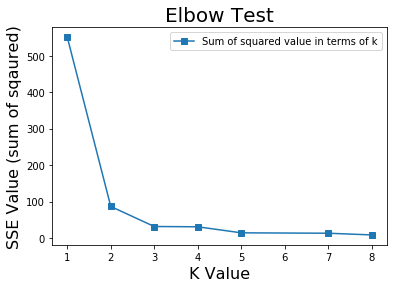

In [262]:
print(SSE_error)
plt.title("Elbow Test", fontsize=20)
plt.xlabel("K Value", fontsize=16)
plt.ylabel("SSE Value (sum of sqaured)",fontsize=16)
plt.plot(k_vals,SSE_error, marker='s')
plt.legend(["Sum of squared value in terms of k"])

In [263]:
diff = []
choice = []
for i in range(1,len(SSE_error)):
    diff.append(abs(SSE_error[i] - SSE_error[i-1]))
    choice.append(k_vals[i])
print(diff)
print([np.argmin(diff)])

[464.23952133095651, 54.974659667433059, 0.77624371023501482, 16.568692301291389, 1.1272090387478855, 4.6144872712073983]
[2]


K Means Clustering Executed......
Old Centroid
{0: [5.5999999999999996, 1.8], 1: [1.5, 0.20000000000000001], 2: [4.0999999999999996, 1.0]}
New Centroid
{0: [5.5148148148148142, 1.9944444444444445], 1: [1.464, 0.24399999999999999], 2: [4.1913043478260867, 1.3021739130434782]}


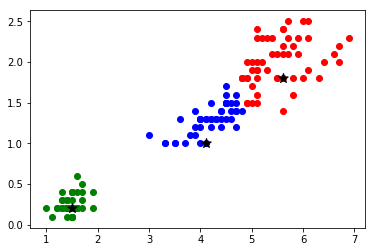

Old Centroid
{0: [5.5148148148148142, 1.9944444444444445], 1: [1.464, 0.24399999999999999], 2: [4.1913043478260867, 1.3021739130434782]}
New Centroid
{0: [5.5384615384615383, 2.0134615384615384], 1: [1.464, 0.24399999999999999], 2: [4.2208333333333332, 1.3104166666666666]}


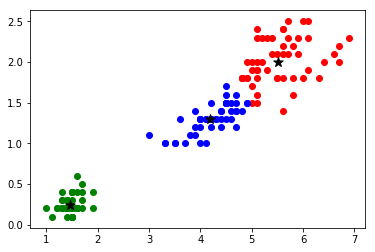

Old Centroid
{0: [5.5384615384615383, 2.0134615384615384], 1: [1.464, 0.24399999999999999], 2: [4.2208333333333332, 1.3104166666666666]}
New Centroid
{0: [5.5836734693877554, 2.0265306122448981], 1: [1.464, 0.24399999999999999], 2: [4.2549019607843146, 1.3392156862745097]}


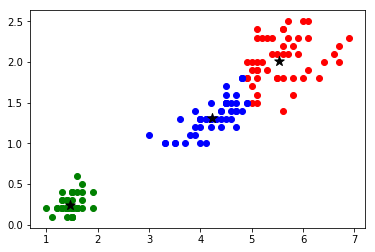

Old Centroid
{0: [5.5836734693877554, 2.0265306122448981], 1: [1.464, 0.24399999999999999], 2: [4.2549019607843146, 1.3392156862745097]}
New Centroid
{0: [5.5958333333333341, 2.0375000000000001], 1: [1.464, 0.24399999999999999], 2: [4.2692307692307701, 1.3423076923076922]}


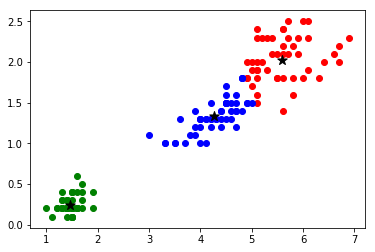

Old Centroid
{0: [5.5958333333333341, 2.0375000000000001], 1: [1.464, 0.24399999999999999], 2: [4.2692307692307701, 1.3423076923076922]}
New Centroid
{0: [5.5958333333333341, 2.0375000000000001], 1: [1.464, 0.24399999999999999], 2: [4.2692307692307701, 1.3423076923076922]}


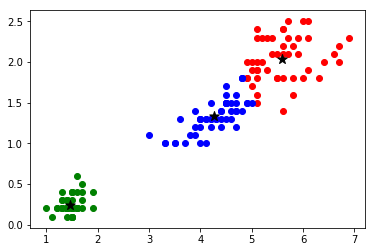

******************** End of Kmeans ***********************


,distance from centroid 0,distance from centroid 1,distance from centroid 2,closest_to,x_val,y_val
0,4.580548,0.077666,3.088260,1,1.4,0.2
1,4.580548,0.077666,3.088260,1,1.4,0.2
2,4.672322,0.169800,3.181383,1,1.3,0.2
3,4.489127,0.056851,2.995581,1,1.5,0.2
4,4.580548,0.077666,3.088260,1,1.4,0.2
5,4.225982,0.282899,2.736584,1,1.7,0.4
6,4.541357,0.085041,3.052686,1,1.4,0.3
7,4.489127,0.056851,2.995581,1,1.5,0.2
8,4.580548,0.077666,3.088260,1,1.4,0.2
9,4.530977,0.148432,3.035122,1,1.5,0.1


In [264]:
center_info, predicted_table, sse_val = K_means(pet_length,pet_width, 3)
predicted_table

In [265]:
print(sse_val)

31.3877589744


In [266]:
f_k_vals = []
for kval, value in center_info.items():
    x_points = predicted_table[predicted_table['closest_to'] == kval]['x_val']
    y_points = predicted_table[predicted_table['closest_to'] == kval]['y_val']
    f_k_vals.append(np.sum(np.power((x_points - value[0]),2) + np.power((y_points - value[1]),2)))
f_val = np.sum(f_k_vals)
f_val

31.387758974358974

In [267]:
predicted_table

,distance from centroid 0,distance from centroid 1,distance from centroid 2,closest_to,x_val,y_val
0,4.580548,0.077666,3.088260,1,1.4,0.2
1,4.580548,0.077666,3.088260,1,1.4,0.2
2,4.672322,0.169800,3.181383,1,1.3,0.2
3,4.489127,0.056851,2.995581,1,1.5,0.2
4,4.580548,0.077666,3.088260,1,1.4,0.2
5,4.225982,0.282899,2.736584,1,1.7,0.4
6,4.541357,0.085041,3.052686,1,1.4,0.3
7,4.489127,0.056851,2.995581,1,1.5,0.2
8,4.580548,0.077666,3.088260,1,1.4,0.2
9,4.530977,0.148432,3.035122,1,1.5,0.1


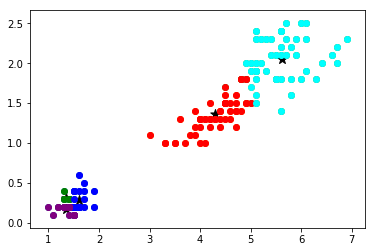

In [65]:
plt = scatter_plot('petal length (cm)','petal width (cm)','target')
color_map = {0:'red',1:'green',2:'blue',3:'purple',4:'cyan', 5:'magenta', 6:'yellow', 7:'brown', 8:'pink',9:'grey'}
for kval, cent_val in center_info.items():
    x_points= predicted_table[predicted_table['closest_to'] == kval]['x_val']
    y_points = predicted_table[predicted_table['closest_to'] == kval]['y_val']
    plt.scatter(cent_val[0],cent_val[1], s=100, marker="*", c="black")
    plt.scatter(x_points, y_points, c=color_map[kval])
plt.show()

In [273]:
predicted = np.sort(predicted_table['closest_to'])
true = np.sort(iris_dataset['target'])
acc_vals = predicted - true
cnt_nonzeroes = np.count_nonzero(acc_vals)
cnt_zeroes = len(acc_vals) - cnt_nonzeroes
accuracy = (cnt_zeroes / len(acc_vals)) * 100
print("The accuracy achieved with clustering is {}%".format(accuracy))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0